# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [60]:
train_dir = r"C:\Users\suert\OneDrive\Escritorio\CNN\seg_train"
test_dir =r"C:\Users\suert\OneDrive\Escritorio\CNN\seg_test"

In [47]:
train_dir = r"C:\Users\suert\OneDrive\Escritorio\CNN\seg_train"
test_dir =r"C:\Users\suert\OneDrive\Escritorio\CNN\seg_test"

# Dimensiones deseadas de las imágenes
img_width = 32
img_height = 32

def load_images(directory):
    images = []
    labels = []

    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                image = cv2.imread(file_path)
                image = cv2.resize(image, (img_width, img_height))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append(image)
                labels.append(folder)
    
    return np.array(images), np.array(labels)

# Cargar imágenes de entrenamiento
train_images, train_labels = load_images(train_dir)

# Cargar imágenes de prueba
test_images, test_labels = load_images(test_dir)

# Verificar las dimensiones de los conjuntos de datos
print("Dimensiones del conjunto de entrenamiento:")
print("Imágenes:", train_images.shape)
print("Etiquetas:", train_labels.shape)
print()
print("Dimensiones del conjunto de prueba:")
print("Imágenes:", test_images.shape)
print("Etiquetas:", test_labels.shape)

Dimensiones del conjunto de entrenamiento:
Imágenes: (14034, 32, 32, 3)
Etiquetas: (14034,)

Dimensiones del conjunto de prueba:
Imágenes: (3000, 32, 32, 3)
Etiquetas: (3000,)


In [61]:
import os
from PIL import Image
import numpy as np

# Ruta de la carpeta principal que contiene las imágenes


# Tamaño de reshape de las imágenes
tamanio_reshape = (32, 32)

# Lista para almacenar las imágenes y etiquetas
imagenes = []
etiquetas = []

# Recorrer las carpetas y cargar las imágenes
for carpeta in os.listdir(train_dir):
    ruta_carpeta = os.path.join(train_dir, carpeta)
    if os.path.isdir(ruta_carpeta):  # Verificar que es una carpeta
        for archivo in os.listdir(train_dir):
            ruta_imagen = os.path.join(train_dir, archivo)
            if os.path.isfile(ruta_imagen):  # Verificar que es un archivo
                try:
                    imagen = Image.open(ruta_imagen)  # Cargar la imagen
                    imagen = imagen.resize(tamanio_reshape)  # Realizar reshape
                    imagen = np.array(imagen)  # Convertir la imagen a un arreglo numpy
                    imagenes.append(imagen)
                    etiquetas.append(carpeta)  # Etiquetar con el nombre de la carpeta
                except (IOError, OSError):
                    print(f"No se pudo cargar la imagen: {ruta_imagen}")

# Convertir las listas de imágenes y etiquetas a arreglos numpy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

# Verificar las dimensiones de los arreglos resultantes
print("Dimensiones de las imágenes:", imagenes.shape)
print("Dimensiones de las etiquetas:", etiquetas.shape)


Dimensiones de las imágenes: (0,)
Dimensiones de las etiquetas: (0,)


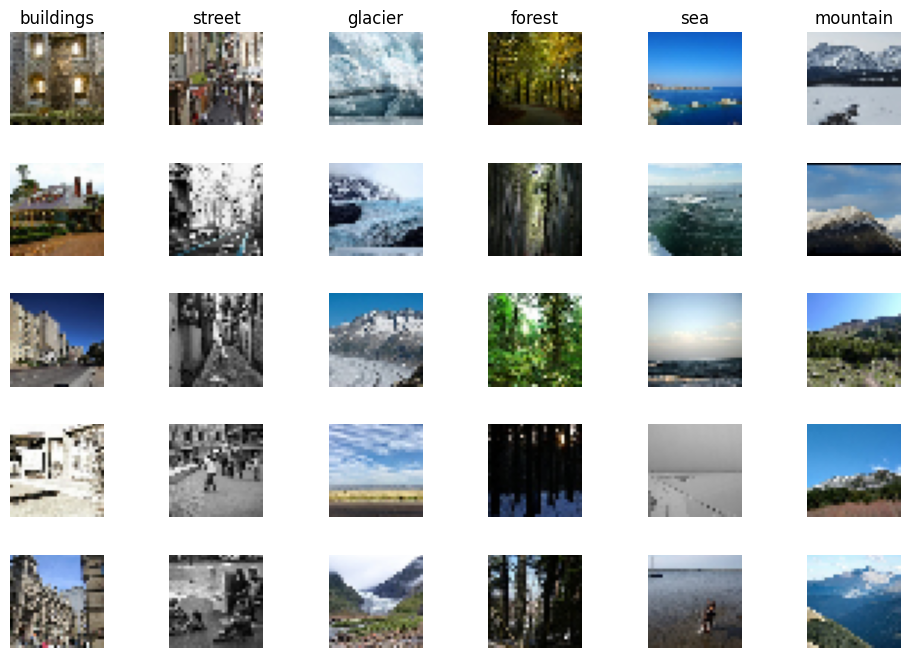

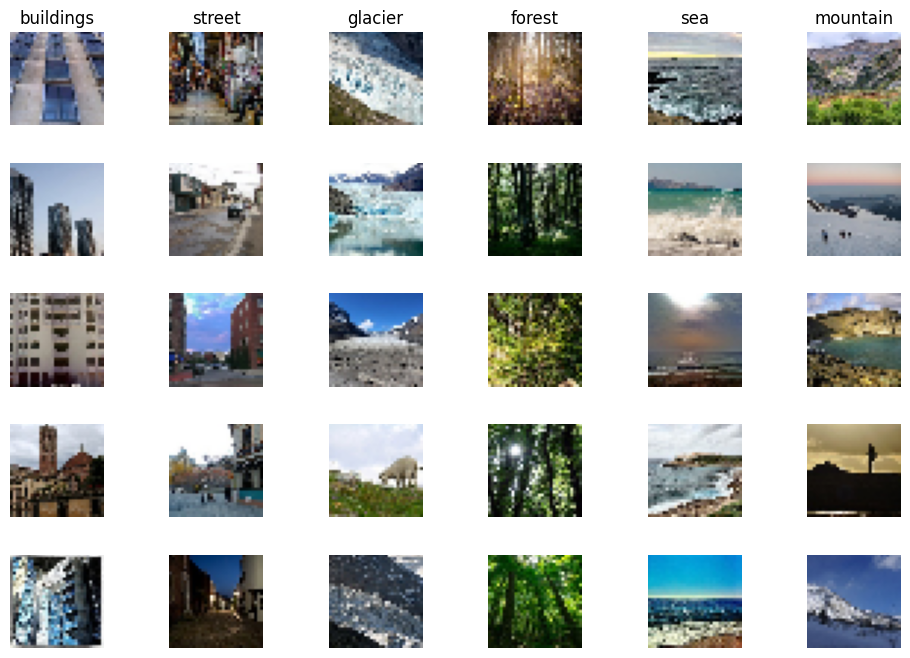

In [48]:

import random

def show_sample_images(images, labels, num_samples=5):
    num_classes = len(set(labels))
    class_names = list(set(labels))
    
    fig, axes = plt.subplots(num_samples, num_classes, figsize=(12, 8))
    fig.subplots_adjust(hspace=0.4)
    
    for i in range(num_samples):
        for j in range(num_classes):
            class_idx = np.where(labels == class_names[j])[0]
            random_idx = random.choice(class_idx)
            image = images[random_idx]
            axes[i, j].imshow(image)
            axes[i, j].axis('off')
            
            if i == 0:
                axes[i, j].set_title(class_names[j])
    
    plt.show()

# Mostrar algunas imágenes de muestra del conjunto de entrenamiento
show_sample_images(train_images, train_labels)

# Mostrar algunas imágenes de muestra del conjunto de prueba
show_sample_images(test_images, test_labels)

In [49]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
class_names = ['mountain','street','glacier', 'buildings','sea','forest']

IMAGE_SIZE = (32,32)

In [13]:
class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [59]:
import tensorflow as tf
from tensorflow.keras import layers

# Definir la arquitectura de la red neuronal
model = tf.keras.Sequential([
    # Capas convolucionales
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Capa completamente conectada
    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    # Capa de salida
    layers.Dense(5, activation='softmax')  # Asegúrate de ajustar 'num_classes' según tu problema
])

# Imprimir el resumen del modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 2304)              0         
                                                                 
 dense_20 (Dense)            (None, 128)              

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





TypeError: Singleton array array('images', dtype='<U6') cannot be considered a valid collection.